In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/disney_plus_shows.csv'

disney_data = pd.read_csv(dataset_path)

disney_data.head()


Mounted at /content/drive


,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"


In [ ]:
#Preprocessing
columns_to_check = ['actors', 'director', 'writer', 'imdb_rating', 'genre']


cleaned_data = disney_data.dropna(subset=columns_to_check, how='any')

cleaned_data.to_csv('/content/drive/MyDrive/cleaned_disneydata.csv', index=False)

display(cleaned_data.head())



,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"
5,tt1846442,12 Dates of Christmas,"A story that follows Kate, a young woman who a...",movie,PG,2011,11 Dec 2011,"November 12, 2019",90 min,"Comedy, Fantasy, Romance",James Hayman,"Aaron Mendelsohn (teleplay), Janet Brownell (t...","Laura Miyata, Vijay Mehta, Amy Smart, Audrey D...",English,USA,1 nomination.,NaN,6.3,"4,933"


In [ ]:
# The shape of the cleaned dataset
print("Number of rows and columns:", disney_data.shape)



Number of rows and columns: (992, 19)


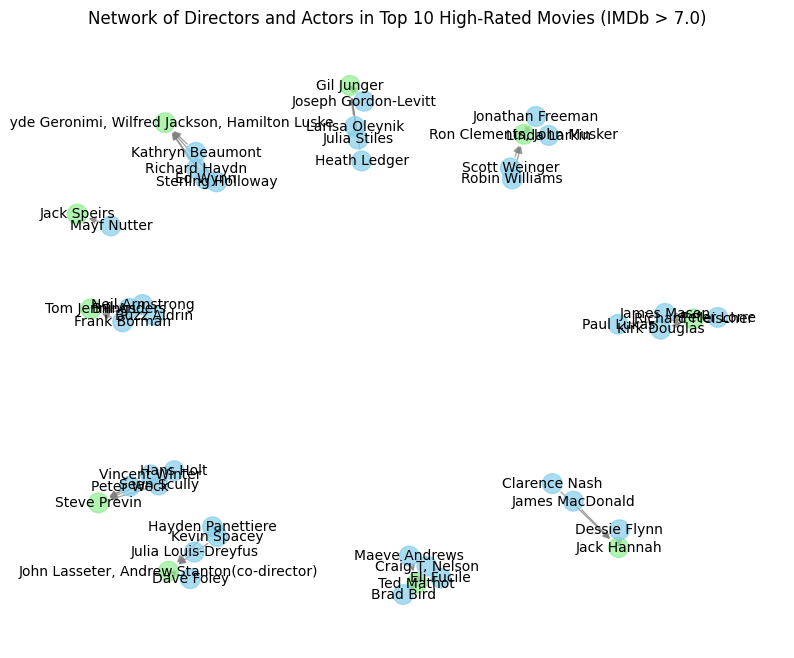

In [ ]:
#Network of Directors and actors

movies_df = pd.read_csv('/content/drive/MyDrive/cleaned_disneydata.csv')

# Filter movies with IMDb rating above 7.0
high_rated_movies = movies_df[movies_df['imdb_rating'] > 7.0]

# Select top 10 highly rated movies
top_10_movies = high_rated_movies.head(10)

# Get unique directors from the top 10 movies
directors = top_10_movies['director'].unique()

G = nx.DiGraph()

for director in directors:
    G.add_node(director.strip(), node_type='director')

for _, movie in top_10_movies.iterrows():
    director = movie['director'].strip()
    for actor in movie['actors'].split(','):
        G.add_node(actor.strip(), node_type='actor')
        G.add_edge(actor.strip(), director)

# Draw the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
node_colors = {'actor': 'skyblue', 'director': 'lightgreen'}
node_types = nx.get_node_attributes(G, 'node_type')
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=[node_colors[node_type] for node_type in node_types.values()], alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Network of Directors and Actors in Top 10 High-Rated Movies (IMDb > 7.0)')
plt.axis('off')
plt.show()


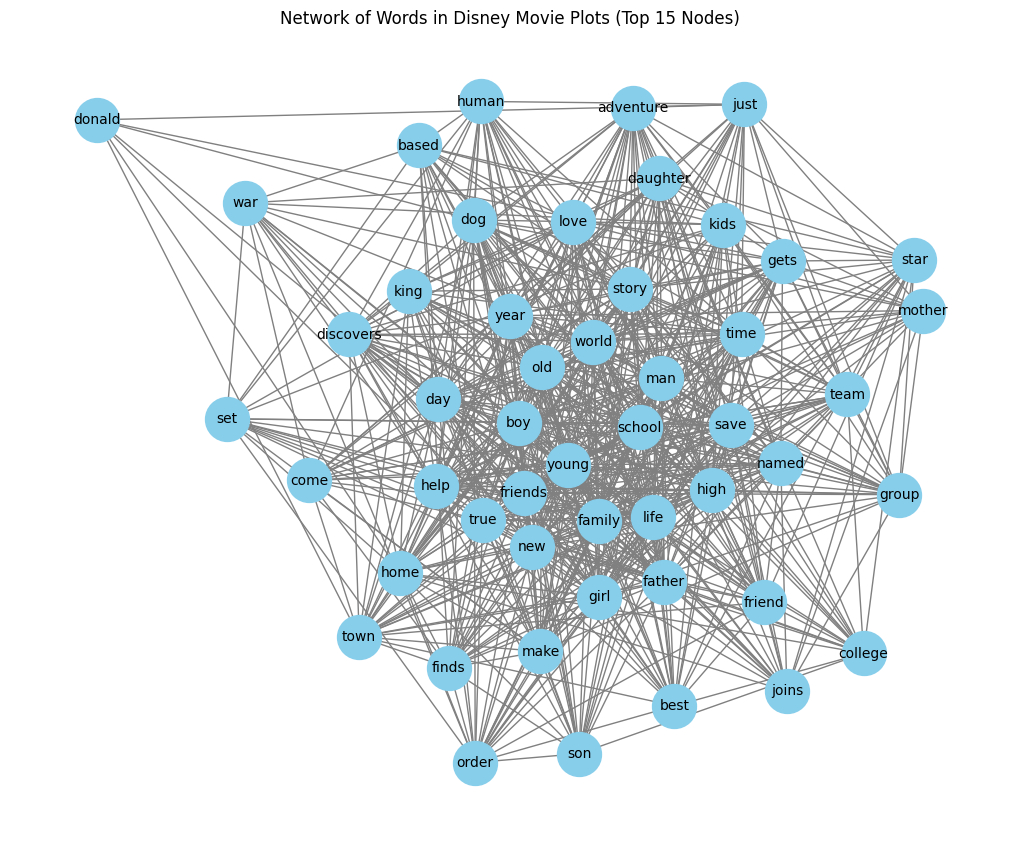

In [ ]:
#Network of words

disney_data = pd.read_csv('/content/drive/MyDrive/cleaned_disneydata.csv')

disney_data = disney_data.dropna(subset=['plot'])

vectorizer = CountVectorizer(stop_words='english')
plot_vectors = vectorizer.fit_transform(disney_data['plot'])

G = nx.Graph()

for word in vectorizer.get_feature_names_out():
    G.add_node(word)

for plot_vector in plot_vectors:
    plot_words = vectorizer.inverse_transform(plot_vector)[0]
    for word1 in plot_words:
        for word2 in plot_words:
            if word1 != word2:
                if G.has_edge(word1, word2):
                    G[word1][word2]['weight'] += 1
                else:
                    G.add_edge(word1, word2, weight=1)

# Network Analysis: Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Get the top 50 nodes with the highest degree centrality
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:50]

# Only the top nodes and their neighbors
top_nodes = [node[0] for node in top_nodes]
subgraph = G.subgraph(top_nodes)

pos = nx.spring_layout(subgraph)

plt.figure(figsize=(10, 8))
nx.draw(subgraph, pos, with_labels=True, node_size=1000, font_size=10, node_color='skyblue', edge_color='gray')
plt.title('Network of Words in Disney Movie Plots (Top 15 Nodes)')
plt.savefig('/content/drive/MyDrive/network_visualization.jpg')
plt.show()




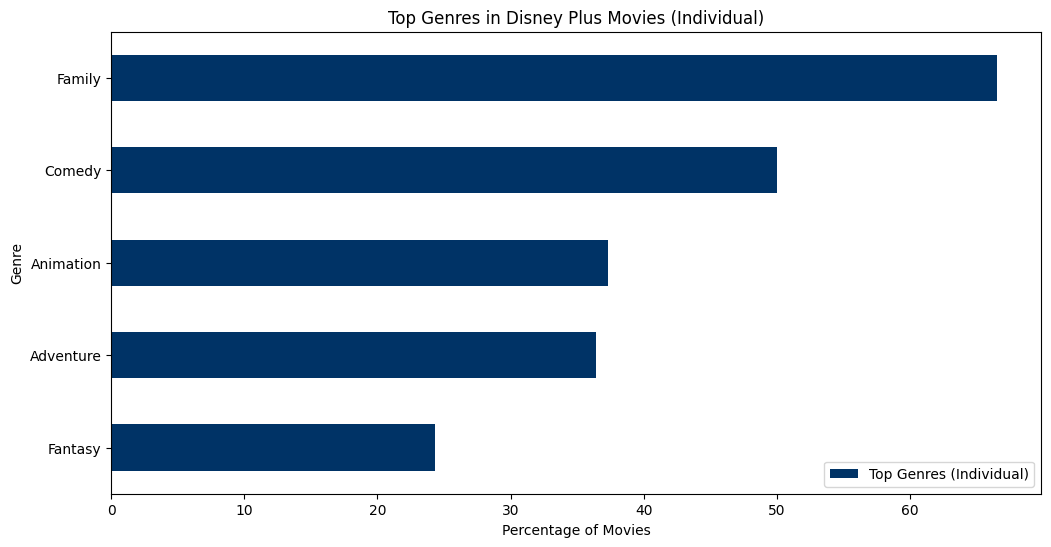

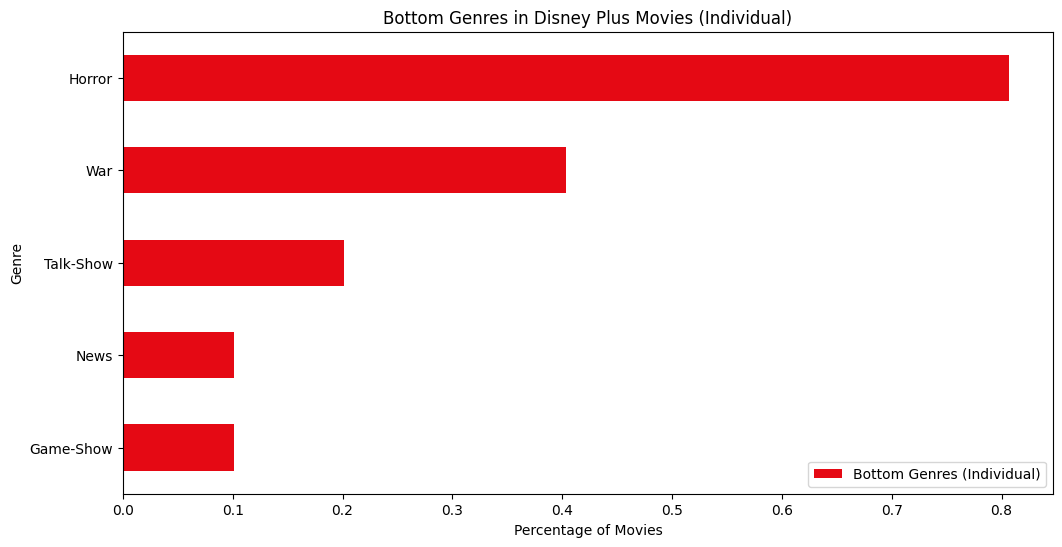

In [ ]:
#Separate Analysis for Individual Genres
genres_stacked = disney_data['genre'].str.split(', ', expand=True).stack()

genre_counts_individual = genres_stacked.value_counts()

percentage_individual = genre_counts_individual / len(disney_data) * 100

top_genres_individual = percentage_individual.head(5).sort_values(ascending=True)
bottom_genres_individual = percentage_individual.tail(5).sort_values(ascending=True)

disney_blue = '#003366'
disney_red = '#e50914'

plt.figure(figsize=(12, 6))
top_genres_individual.plot(kind='barh', color=disney_blue, label='Top Genres (Individual)')
plt.title('Top Genres in Disney Plus Movies (Individual)')
plt.xlabel('Percentage of Movies')
plt.ylabel('Genre')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
bottom_genres_individual.plot(kind='barh', color=disney_red, label='Bottom Genres (Individual)')
plt.title('Bottom Genres in Disney Plus Movies (Individual)')
plt.xlabel('Percentage of Movies')
plt.ylabel('Genre')
plt.legend()
plt.show()


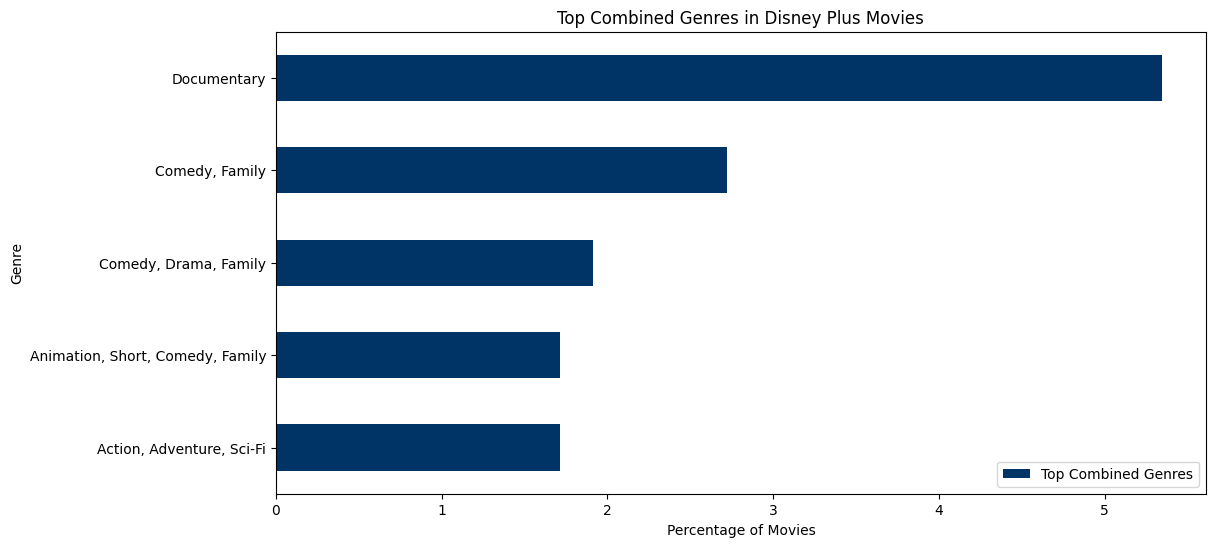

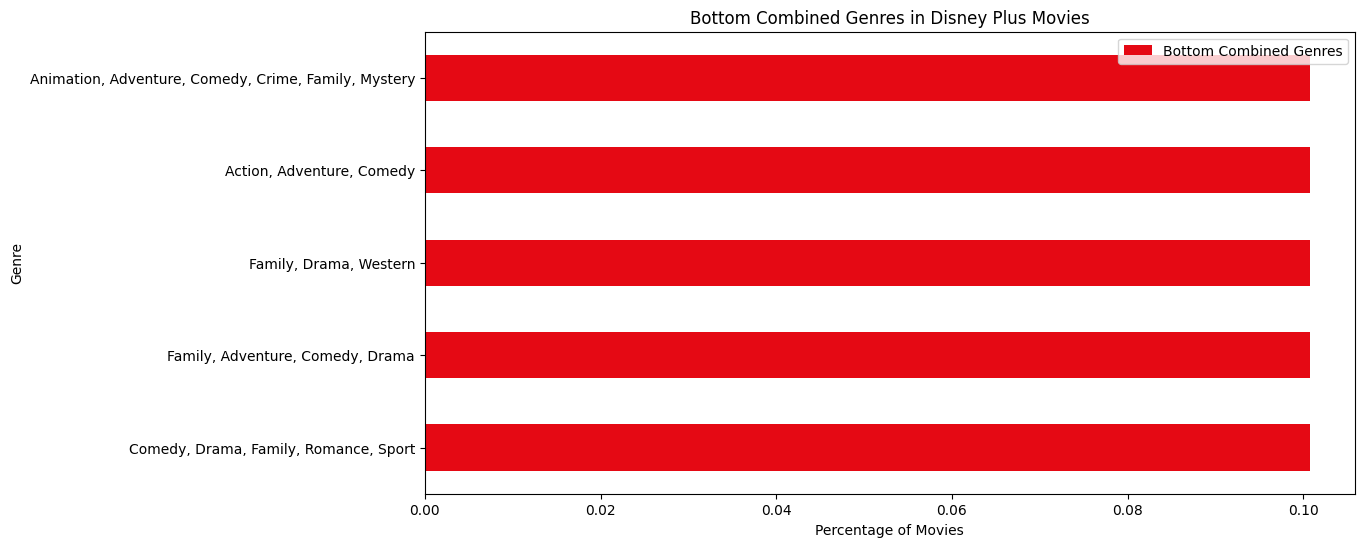

In [ ]:
#Combined Analysis for Genres:

genre_counts_combined = disney_data['genre'].value_counts()

percentage_combined = genre_counts_combined / len(disney_data) * 100


top_genres_combined = percentage_combined.head(5).sort_values(ascending=True)
bottom_genres_combined = percentage_combined.tail(5).sort_values(ascending=True)
plt.figure(figsize=(12, 6))
top_genres_combined.plot(kind='barh', color=disney_blue, label='Top Combined Genres')
plt.title('Top Combined Genres in Disney Plus Movies')
plt.xlabel('Percentage of Movies')
plt.ylabel('Genre')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
bottom_genres_combined.plot(kind='barh', color=disney_red, label='Bottom Combined Genres')
plt.title('Bottom Combined Genres in Disney Plus Movies')
plt.xlabel('Percentage of Movies')
plt.ylabel('Genre')
plt.legend()
plt.show()

In [ ]:
#Sentiment score for each movie plot
sentiment_classifier = pipeline("sentiment-analysis")

# Performing sentiment analysis for each plot description
sentiment_predictions = []

for plot_description in disney_data['plot']:

    if isinstance(plot_description, str):

        sentiment = sentiment_classifier([plot_description])[0]
        sentiment_predictions.append(sentiment)
    else:
        sentiment_predictions.append(None)


disney_data['sentiment'] = sentiment_predictions

print(disney_data[['title', 'plot', 'sentiment']])

disney_data.to_csv('/content/drive/MyDrive/sentiment_analysis_results.csv', index=False)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

                                          title  \
0                    10 Things I Hate About You   
1                          101 Dalmatian Street   
2                                101 Dalmatians   
3    101 Dalmatians 2: Patch's London Adventure   
4                                102 Dalmatians   
..                                          ...   
987                                      Zapped   
988             Zenon: Girl of the 21st Century   
989                           Zenon: The Zequel   
990                                   Zenon: Z3   
991                                    Zootopia   

                                                  plot  \
0    A pretty, popular teenager can't go out on a d...   
1    This series follows the lives of Delilah and D...   
2    An evil high-fashion designer plots to steal D...   
3    Being one of 101 takes its toll on Patch, who ...   
4    Cruella DeVil gets out of prison and goes afte...   
..                                     

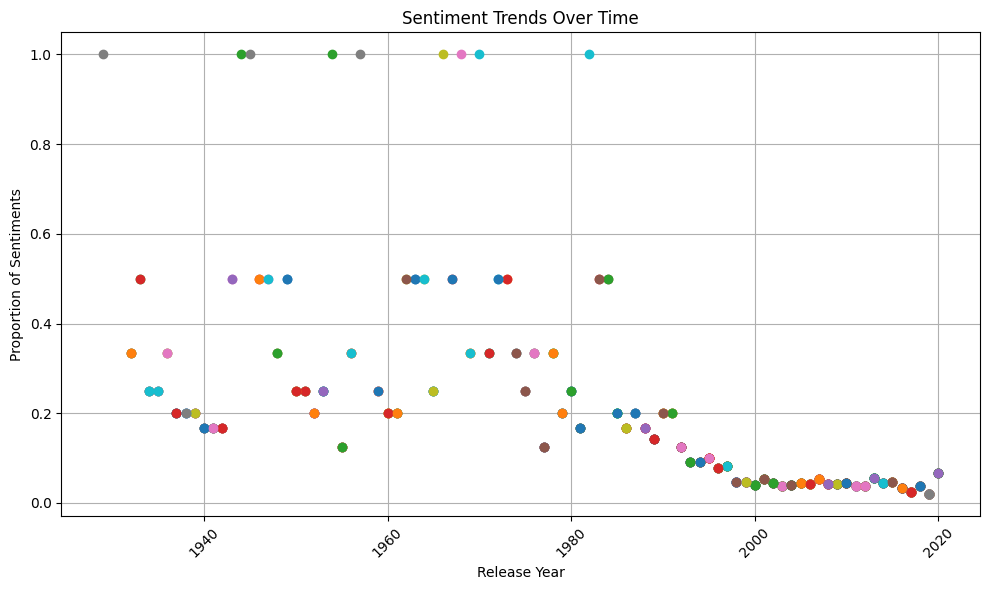

In [ ]:
# Plot sentiment trends over time

sentiment_data = pd.read_csv('/content/drive/MyDrive/sentiment_analysis_results.csv')


sentiment_data['released_at'] = pd.to_datetime(sentiment_data['released_at'])

sentiment_data['year'] = sentiment_data['released_at'].dt.year
sentiment_trends = sentiment_data.groupby('year')['sentiment'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10, 6))
for sentiment in sentiment_trends.columns:
    plt.plot(sentiment_trends.index, sentiment_trends[sentiment], marker='o', label=sentiment)

plt.title('Sentiment Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Proportion of Sentiments')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()



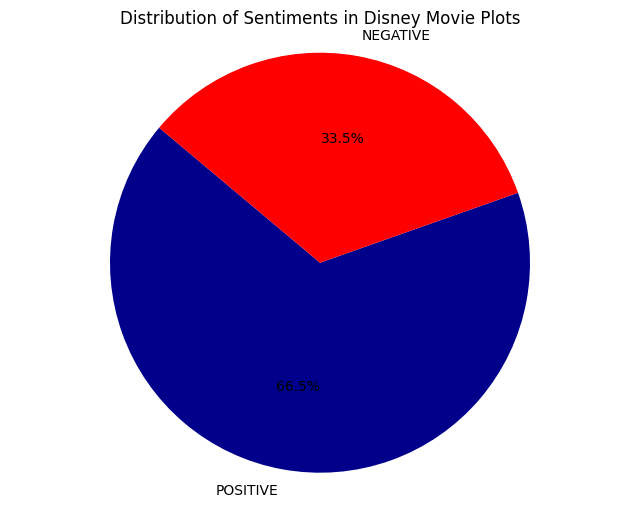

In [ ]:
#Positive and Negative Sentiment percentage
# We filter out rows where sentiment is None
filtered_sentiments = disney_data['sentiment'].dropna()

sentiment_counts = filtered_sentiments.apply(lambda x: x['label']).value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['darkblue', 'red'], startangle=140)
plt.title('Distribution of Sentiments in Disney Movie Plots')
plt.axis('equal')
plt.show()



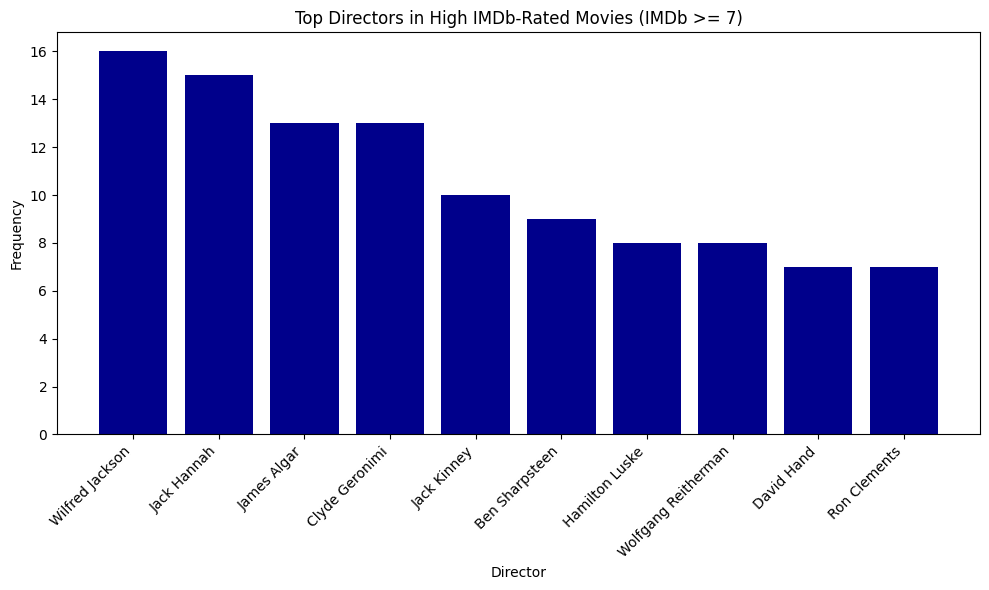

In [ ]:
#Top directors in High IMDB rated movies
# Filter movies with IMDb ratings of 7 or higher
high_imdb_movies = disney_data[disney_data['imdb_rating'] >= 7.0]

# Count the frequencies of directors for high IMDb-rated movies
director_frequency_df = high_imdb_movies['director'].str.split(', ').explode().value_counts().reset_index()
director_frequency_df.columns = ['Director', 'Frequency']

top_directors = director_frequency_df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_directors['Director'], top_directors['Frequency'], color='darkblue')
plt.title('Top Directors in High IMDb-Rated Movies (IMDb >= 7)')
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




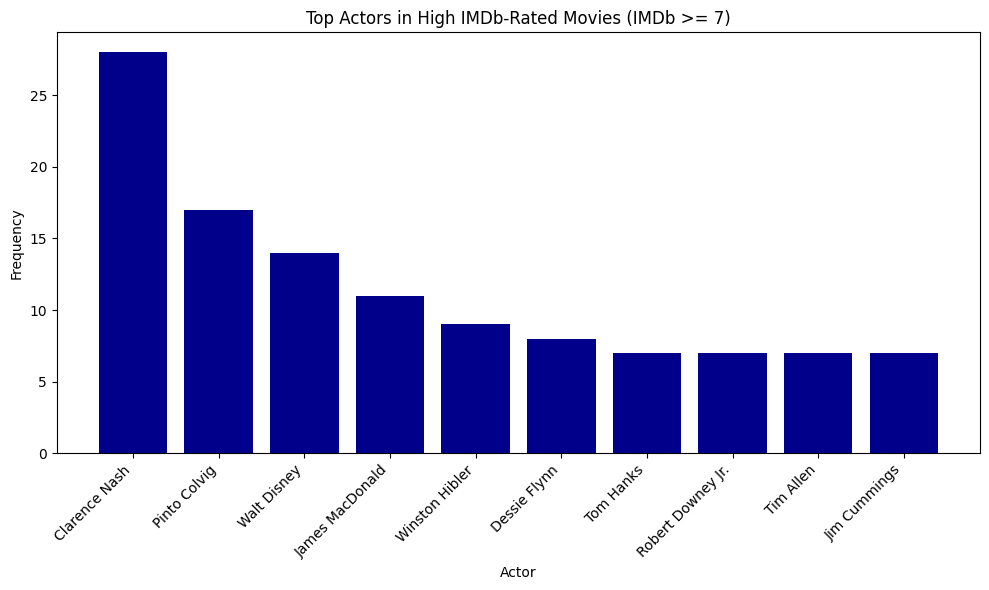

In [ ]:
# Top actors for high IMDb-rated movies
high_imdb_movies = disney_data[disney_data['imdb_rating'] >= 7.0]

# Count the frequencies of actors for high IMDb-rated movies
actor_frequency_df = high_imdb_movies['actors'].str.split(', ').explode().value_counts().reset_index()
actor_frequency_df.columns = ['Actor', 'Frequency']

top_actors = actor_frequency_df.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_actors['Actor'], top_actors['Frequency'], color='darkblue')
plt.title('Top Actors in High IMDb-Rated Movies (IMDb >= 7)')
plt.xlabel('Actor')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
